<a href="https://colab.research.google.com/github/MSURENDRAN/Large_Language_Models/blob/main/2348527_LLM_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt
import re
from collections import Counter
import dateutil.parser as dparser
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
text = "Hey there! It's been a while since we last caught up, hasn't it? Anyway, I hope you're doing well. I wanted to remind you about the upcoming meeting on Friday at 3:00 PM. Oh, and don't forget to bring your laptop; we'll need it for the presentation. By the way, if you have any questions or concerns, feel free to shoot me an email at suren@email.com or give me a call at 9843421614. Also, just a heads up, my date of birth is 27-03-2000, Sanjay's is 09-06-2000 and Victor's is 10-10-2002. Looking forward to seeing you on Friday!"

In [ ]:
# a. Count the number of unique tokens in the text
tokens = word_tokenize(text)
unique_tokens = set(tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 86


In [ ]:
# b. Count the number of punctuation characters and remove punctuations
punctuation_count = len([char for char in text if char in string.punctuation])
print(f"Number of punctuation characters: {punctuation_count}")
text_without_punctuations = re.sub(r'[^\w\s]', '', text)

Number of punctuation characters: 33


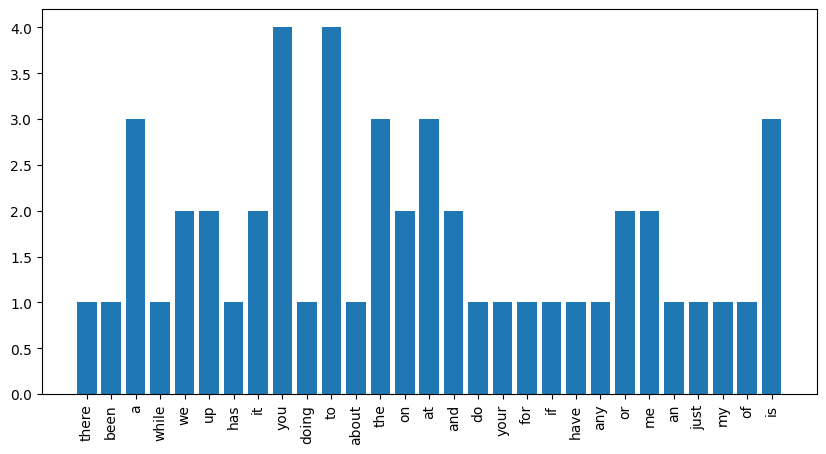

In [ ]:
# c. Plot the distribution of stopwords used in the text using barplot
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
stopwords_in_text = [token for token in tokens if token in stop_words]
freq_dist = FreqDist(stopwords_in_text)

plt.figure(figsize=(10, 5))
plt.bar(freq_dist.keys(), freq_dist.values())
plt.xticks(rotation=90)
plt.show()

In [ ]:
# d. Remove the stopwords from the text
tokens_without_stopwords = [token for token in tokens if token not in stop_words]

<BarContainer object of 24 artists>

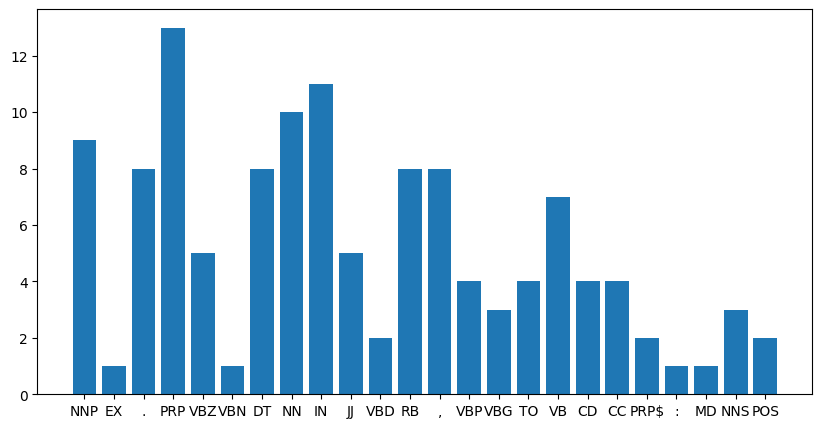

In [ ]:
# e. Plot the distribution of each POS Tag using a barplot
pos_tags = pos_tag(tokens)
pos_freq = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(10, 5))
plt.bar(pos_freq.keys(), pos_freq.values())

In [ ]:
# f. Determine the number of unique lemma available in the text
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in tokens]
unique_lemmas = set(lemmas)
print(f"Number of unique lemmas: {len(unique_lemmas)}")

Number of unique lemmas: 86


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


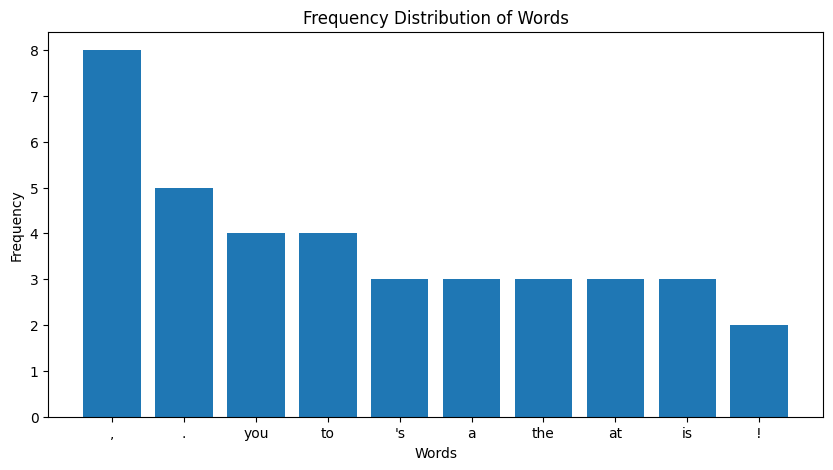

In [ ]:
# g. Plot the frequency distribution of words in the text
freq_dist = nltk.FreqDist(tokens)

# Get 10 most common words and their counts
common_words = freq_dist.most_common(10)

# Separate words and counts into two lists
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(words, counts)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Words')

plt.show()


In [ ]:
# h. Find the number of unique bigrams, trigrams and quadgrams (n=4) in the corpus
bigrams = set(ngrams(tokens, 2))
trigrams = set(ngrams(tokens, 3))
quadgrams = set(ngrams(tokens, 4))
print(f"Number of unique bigrams: {len(bigrams)}")
print(f"Number of unique trigrams: {len(trigrams)}")
print(f"Number of unique quadgrams: {len(quadgrams)}")

Number of unique bigrams: 120
Number of unique trigrams: 122
Number of unique quadgrams: 121


In [ ]:
# i. Find all dates and convert them to the DD-MM-YYYY format
dates = re.findall(r'\b\d{2}-\d{2}-\d{4}\b', text)
print(f"Dates: {dates}")


Dates: ['27-03-2000', '09-06-2000', '10-10-2002']


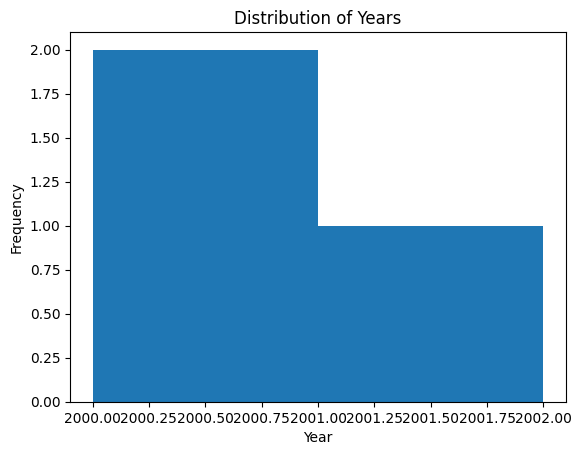

In [ ]:
# j. Plot a distribution of the different values of year occurring in the text
years = [int(date.split('-')[2]) for date in dates]
plt.hist(years, bins=len(set(years)))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

In [ ]:
# k. Determine whether the text contains any phone numbers in it
phone_numbers = re.findall(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', text)
print(f"Phone numbers: {phone_numbers}")

Phone numbers: ['9843421614']


###Text Analysis and Natural Language Processing have a wide range of uses such as information retrievel(like search engines), sentiment analysis(understanding emotions of users), similarity check(eg. Plagarism Checker), recomendation system, language translation, and many more.
###The specific techniques used in these applications. For example, tokenization and lemmatization are often the first steps in preprocessing text data for further analysis. Stopword removal, POS tagging, and n-gram extraction are used to simplify the text and extract useful features for tasks like text classification, named entity recognition, and part-of-speech tagging. Understanding the distribution of words, lemmas, and POS tags can give you insights into the content and structure of the text, which can be useful in tasks like authorship attribution or text summarization.